In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = {
    'attendance': [80, 55, 90, 70, 65, 40, 85, 95, 30, 50],
    'avg_quiz_score': [70, 45, 85, 60, 55, 35, 78, 92, 20, 40],
    'has_device': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
    'internet_stability': [3, 1, 4, 2, 1, 0, 3, 4, 0, 1],  # 0: No connectivity to 4: Very stable
    'engagement_level': [3, 1, 4, 2, 2, 1, 3, 4, 1, 1],  # 1: Low, 4: High
    'dropout_risk': [0, 1, 0, 0, 1, 1, 0, 0, 1, 1]  # 1: At Risk, 0: Not At Risk
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
X = df.drop('dropout_risk', axis=1)
y = df['dropout_risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



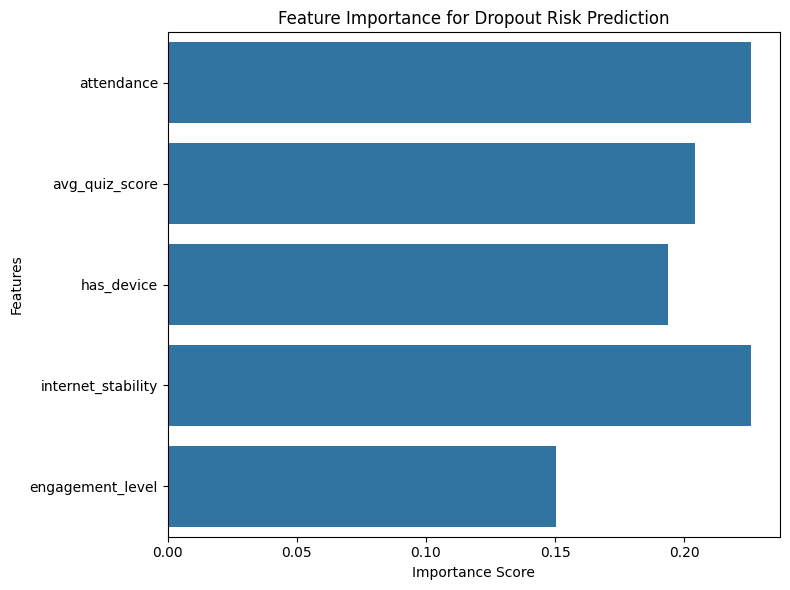

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance for Dropout Risk Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()